# genetic algorithm

In [14]:
import pickle
#from sklearn.ensemble import BaggingClassifier
from sklearn.tree import DecisionTreeClassifier
train='./small/AD-S1.csv'
#train='./Aalto_BIG_train_IoTDevID.csv'
vali='./small/DI-S1.csv'
test='./small/DI-S2.csv'
pickle_name="GA_input_features.pickle"
with open(pickle_name, 'rb') as handle:
    GA_input_features = pickle.load(handle)
GA_input_features.append("Label")
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings("ignore")
import pandas as pd
import pickle
import time
import random
from tqdm import tqdm
import sklearn
import numpy as np
from tabulate import tabulate


In [15]:
def makePie(name):
    df = pd.read_csv(name,usecols=["Label"])#,header=None )
    your_data = dict(df.groupby("Label").size())

    x = np.char.array(list(your_data.keys()))
    y = np.array(list(your_data.values()))
    print(your_data)
    colors = ['yellowgreen','red','gold','lightskyblue','black','lightcoral','blue','pink', 'darkgreen','yellow','grey','violet','magenta','cyan']
    porcent = 100.*y/y.sum()
    
    patches, texts = plt.pie(y,colors=colors,   startangle=90, radius=1.2)
    labels = ['{0} - {1:1.2f} %'.format(i,j) for i,j in zip(x, porcent)]
    
    sort_legend = True
    if sort_legend:
        patches, labels, dummy =  zip(*sorted(zip(patches, labels, y),
                                              key=lambda x: x[2],
                                              reverse=True))
    
    plt.legend(patches, labels, loc= 'upper right', bbox_to_anchor=(-0.1, 1.),
               fontsize=8)
    plt.savefig('piechart.png', bbox_inches='tight')
    
    plt.show()


In [16]:
file_list={"DD11":['./small/AD-S1.csv','./small/DI-S1.csv','./small/DI-S2.csv'],
"DD11T":['./small/DI-S1.csv','./small/AD-S1.csv','./small/AD-S2.csv'],
"DD12":['./small/AD-S1.csv','./small/DI-S2.csv','./small/DI-S1.csv'],
"DD12T":['./small/DI-S2.csv','./small/AD-S1.csv','./small/AD-S2.csv'],
"DD22":['./small/AD-S2.csv','./small/DI-S2.csv','./small/DI-S1.csv'],
"DD22T":['./small/DI-S2.csv','./small/AD-S2.csv','./small/AD-S1.csv'],
"DD21":['./small/AD-S2.csv','./small/DI-S1.csv','./small/DI-S2.csv'],
"DD21T":['./small/DI-S1.csv','./small/AD-S2.csv','./small/AD-S1.csv']}
# In[48]:

./small/AD-S1.csv
{'Amazon Echo': 10000, 'Awair air quality monitor': 1064, 'Belkin Wemo switch': 3395, 'Belkin wemo motion sensor': 10000, 'Dropcam': 726, 'HP Printer': 1707, 'Light Bulbs LiFX Smart Bulb': 3550, 'MacBook': 185, 'NEST Protect smoke alarm': 871, 'Netatmo Welcome': 1540, 'Netatmo weather station': 429, 'PIX-STAR Photo-frame': 1043, 'Phillip Hue Lightbulb': 7863, 'Samsung Galaxy Tab': 10000, 'Samsung SmartCam': 5043, 'Smart Things': 2549, 'TP-Link Day Night Cloud camera': 947, 'TP-Link Smart plug': 954, 'TPLink Router Bridge LAN': 10000, 'Triby Speaker': 2714, 'iHome': 1568}


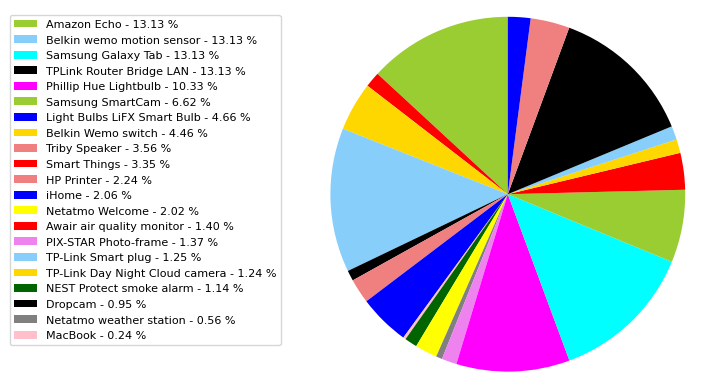

**********************************************************************************************************************************






./small/DI-S1.csv
{'Amazon Echo': 10000, 'Awair air quality monitor': 930, 'Belkin Wemo switch': 7501, 'Belkin wemo motion sensor': 10000, 'Dropcam': 1443, 'HP Printer': 1198, 'Light Bulbs LiFX Smart Bulb': 3341, 'MacBook': 3147, 'NEST Protect smoke alarm': 10, 'Netatmo Welcome': 3444, 'Netatmo weather station': 715, 'PIX-STAR Photo-frame': 1051, 'Phillip Hue Lightbulb': 4728, 'Samsung Galaxy Tab': 1880, 'Samsung SmartCam': 6520, 'Smart Things': 1963, 'TP-Link Day Night Cloud camera': 1420, 'TP-Link Smart plug': 985, 'TPLink Router Bridge LAN': 9883, 'Triby Speaker': 950, 'iHome': 643}


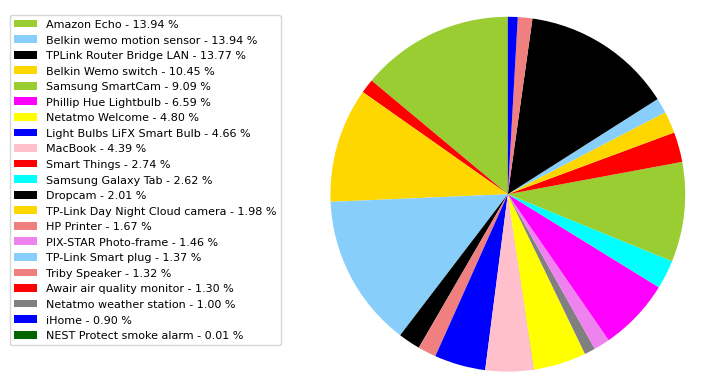

**********************************************************************************************************************************






./small/AD-S1.csv
{'Amazon Echo': 10000, 'Awair air quality monitor': 1064, 'Belkin Wemo switch': 3395, 'Belkin wemo motion sensor': 10000, 'Dropcam': 726, 'HP Printer': 1707, 'Light Bulbs LiFX Smart Bulb': 3550, 'MacBook': 185, 'NEST Protect smoke alarm': 871, 'Netatmo Welcome': 1540, 'Netatmo weather station': 429, 'PIX-STAR Photo-frame': 1043, 'Phillip Hue Lightbulb': 7863, 'Samsung Galaxy Tab': 10000, 'Samsung SmartCam': 5043, 'Smart Things': 2549, 'TP-Link Day Night Cloud camera': 947, 'TP-Link Smart plug': 954, 'TPLink Router Bridge LAN': 10000, 'Triby Speaker': 2714, 'iHome': 1568}


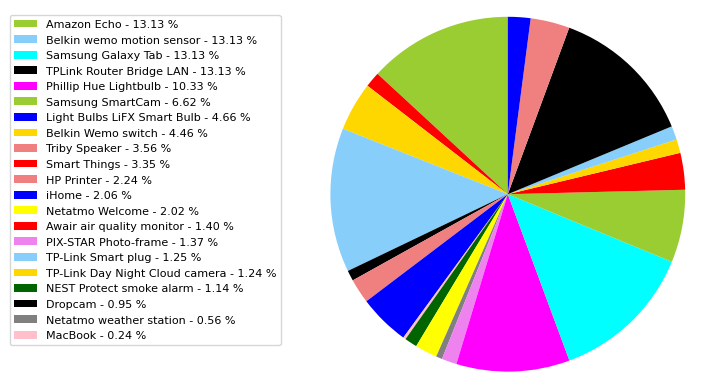

**********************************************************************************************************************************






./small/DI-S2.csv
{'Amazon Echo': 10000, 'Awair air quality monitor': 441, 'Belkin Wemo switch': 7130, 'Belkin wemo motion sensor': 10000, 'Dropcam': 725, 'HP Printer': 1180, 'Light Bulbs LiFX Smart Bulb': 3359, 'MacBook': 5330, 'NEST Protect smoke alarm': 326, 'Netatmo Welcome': 5212, 'Netatmo weather station': 731, 'PIX-STAR Photo-frame': 408, 'Phillip Hue Lightbulb': 8069, 'Samsung Galaxy Tab': 9128, 'Samsung SmartCam': 9973, 'Smart Things': 1975, 'TP-Link Day Night Cloud camera': 1232, 'TP-Link Smart plug': 947, 'TPLink Router Bridge LAN': 10000, 'Triby Speaker': 1369, 'iHome': 1279}


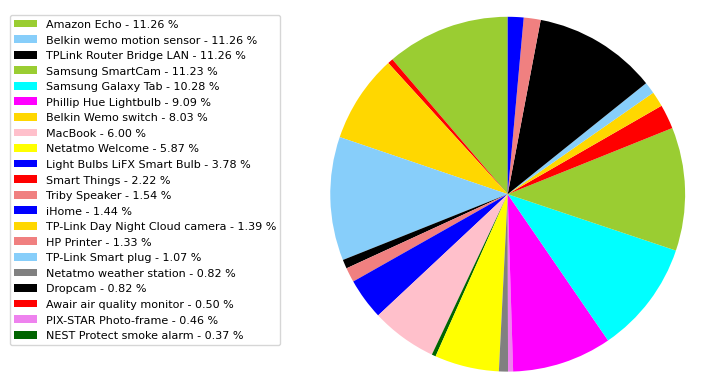

**********************************************************************************************************************************






./small/AD-S2.csv
{'Amazon Echo': 4291, 'Awair air quality monitor': 1080, 'Belkin Wemo switch': 2660, 'Belkin wemo motion sensor': 10000, 'Dropcam': 1313, 'HP Printer': 1471, 'Light Bulbs LiFX Smart Bulb': 1752, 'MacBook': 906, 'NEST Protect smoke alarm': 17, 'Netatmo Welcome': 1778, 'Netatmo weather station': 353, 'PIX-STAR Photo-frame': 1002, 'Phillip Hue Lightbulb': 6617, 'Samsung Galaxy Tab': 5600, 'Samsung SmartCam': 4594, 'Smart Things': 2382, 'TP-Link Day Night Cloud camera': 832, 'TP-Link Smart plug': 882, 'TPLink Router Bridge LAN': 10000, 'Triby Speaker': 1184, 'iHome': 1397}


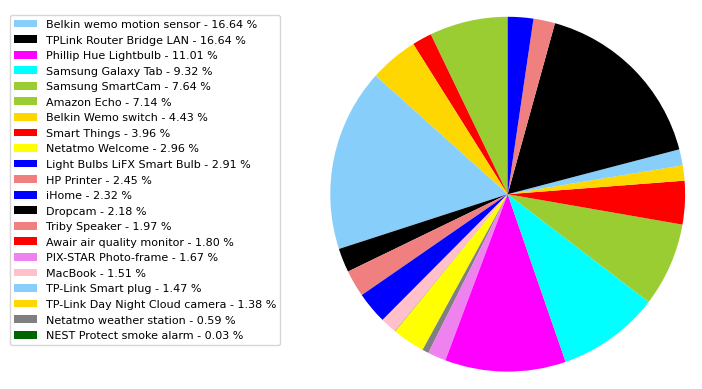

**********************************************************************************************************************************






./small/DI-S2.csv
{'Amazon Echo': 10000, 'Awair air quality monitor': 441, 'Belkin Wemo switch': 7130, 'Belkin wemo motion sensor': 10000, 'Dropcam': 725, 'HP Printer': 1180, 'Light Bulbs LiFX Smart Bulb': 3359, 'MacBook': 5330, 'NEST Protect smoke alarm': 326, 'Netatmo Welcome': 5212, 'Netatmo weather station': 731, 'PIX-STAR Photo-frame': 408, 'Phillip Hue Lightbulb': 8069, 'Samsung Galaxy Tab': 9128, 'Samsung SmartCam': 9973, 'Smart Things': 1975, 'TP-Link Day Night Cloud camera': 1232, 'TP-Link Smart plug': 947, 'TPLink Router Bridge LAN': 10000, 'Triby Speaker': 1369, 'iHome': 1279}


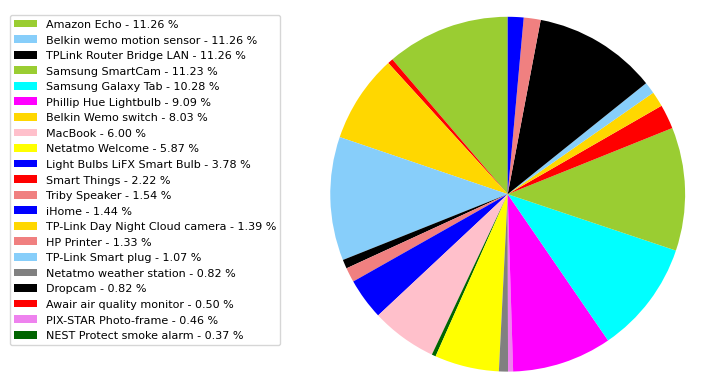

**********************************************************************************************************************************






./small/AD-S2.csv
{'Amazon Echo': 4291, 'Awair air quality monitor': 1080, 'Belkin Wemo switch': 2660, 'Belkin wemo motion sensor': 10000, 'Dropcam': 1313, 'HP Printer': 1471, 'Light Bulbs LiFX Smart Bulb': 1752, 'MacBook': 906, 'NEST Protect smoke alarm': 17, 'Netatmo Welcome': 1778, 'Netatmo weather station': 353, 'PIX-STAR Photo-frame': 1002, 'Phillip Hue Lightbulb': 6617, 'Samsung Galaxy Tab': 5600, 'Samsung SmartCam': 4594, 'Smart Things': 2382, 'TP-Link Day Night Cloud camera': 832, 'TP-Link Smart plug': 882, 'TPLink Router Bridge LAN': 10000, 'Triby Speaker': 1184, 'iHome': 1397}


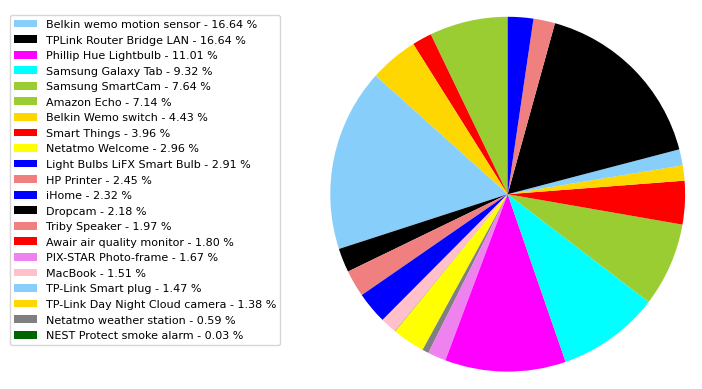

**********************************************************************************************************************************






./small/DI-S1.csv
{'Amazon Echo': 10000, 'Awair air quality monitor': 930, 'Belkin Wemo switch': 7501, 'Belkin wemo motion sensor': 10000, 'Dropcam': 1443, 'HP Printer': 1198, 'Light Bulbs LiFX Smart Bulb': 3341, 'MacBook': 3147, 'NEST Protect smoke alarm': 10, 'Netatmo Welcome': 3444, 'Netatmo weather station': 715, 'PIX-STAR Photo-frame': 1051, 'Phillip Hue Lightbulb': 4728, 'Samsung Galaxy Tab': 1880, 'Samsung SmartCam': 6520, 'Smart Things': 1963, 'TP-Link Day Night Cloud camera': 1420, 'TP-Link Smart plug': 985, 'TPLink Router Bridge LAN': 9883, 'Triby Speaker': 950, 'iHome': 643}


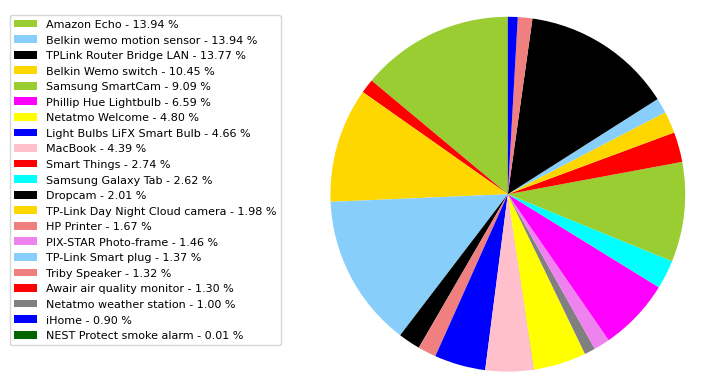

**********************************************************************************************************************************








In [17]:
for i in file_list:
    print(file_list[i][0])
    makePie(file_list[i][0])
    print("*"*130)
    print("\n"*5)

In [18]:
from  ML_initial_test import ML

fold=1
#df=ML(GA_input_features,train,vali,test,fold)

In [19]:
files_add=['csvs\\AD-S1.csv', 'csvs\\AD-S2.csv', 'csvs\\DI-S1.csv', 'csvs\\DI-S2.csv']
for i in files_add:
    df=pd.read_csv(i)
    df = df.groupby('Label').apply(lambda x: x.sample(n=min(10000, len(x))))
    df = df.droplevel('Label')
    name=i.replace("csvs","small")
    #df.to_csv(name,index=False)

In [20]:
from  ML_initial_test import ML
#ml_list={"BaggingClassifier":BaggingClassifier()}
ml_list={"DecisionTreeClassifier":DecisionTreeClassifier()}

fold=10
df=ML(GA_input_features,train,vali,test,fold,ml_list)

100%|████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:46<00:00, 46.32s/it]

    ML                        Vali-ACC    Vali-F1    Vali-STD    Test-ACC    Test-F1    Test-STD    Total-TIME
--  ----------------------  ----------  ---------  ----------  ----------  ---------  ----------  ------------
 0  DecisionTreeClassifier      0.6143     0.5128      0.0137      0.5488     0.4825      0.0173       46.3178


In [8]:
def FeatureMaker(f):
    selected=[]
    for i,ii in enumerate(f):
        if ii:
            selected.append(GA_input_features[i])
    return selected

In [9]:
def ReadCSV(features,train,vali,test):
    df = pd.read_csv(train,usecols=features)#,header=None )
    X_train =df[df.columns[0:-1]]
    #X_train=np.array(X_train)
    df[df.columns[-1]] = df[df.columns[-1]].astype('category')
    y_train=df[df.columns[-1]].cat.codes  
    
    df = pd.read_csv(vali,usecols=features)#,header=None )
    X_vali =df[df.columns[0:-1]]
    #X_test=np.array(X_test)
    df[df.columns[-1]] = df[df.columns[-1]].astype('category')
    y_vali=df[df.columns[-1]].cat.codes  
    
    df = pd.read_csv(test,usecols=features)#,header=None )
    X_test =df[df.columns[0:-1]]
    #X_test=np.array(X_test)
    df[df.columns[-1]] = df[df.columns[-1]].astype('category')
    y_test=df[df.columns[-1]].cat.codes  
    return X_train, y_train,  X_vali, y_vali, X_test, y_test

In [10]:
model=DecisionTreeClassifier()

In [21]:
#defining various steps required for the genetic algorithm
# GA adapted from https://datascienceplus.com/genetic-algorithm-in-machine-learning-using-python/
def initilization_of_population(size,n_feat):
    population = []
    for i in range(size):
        chromosome = np.ones(n_feat,dtype=np.bool_)
        chromosome[:int(0.3*n_feat)]=False
        np.random.shuffle(chromosome)
        population.append(chromosome)
    return population

def fitness_score(population):
    scores = []
    for chromosome in population:
        model.fit(X_train.iloc[:,chromosome],y_train)
        predictions = model.predict(X_test.iloc[:,chromosome])
        scores.append(sklearn.metrics.f1_score(y_test,predictions,average= "macro"))
    scores, population = np.array(scores), np.array(population) 
    inds = np.argsort(scores)
    return list(scores[inds][::-1]), list(population[inds,:][::-1])

def selection(pop_after_fit,n_parents):
    population_nextgen = []
    for i in range(n_parents):
        population_nextgen.append(pop_after_fit[i])
    return population_nextgen

def crossover(pop_after_sel):
    population_nextgen=pop_after_sel
    for i in range(len(pop_after_sel)):
        child=pop_after_sel[i]
        child[3:7]=pop_after_sel[(i+1)%len(pop_after_sel)][3:7]
        population_nextgen.append(child)
    return population_nextgen

def mutation(pop_after_cross,mutation_rate):
    population_nextgen = []
    for i in range(0,len(pop_after_cross)):
        chromosome = pop_after_cross[i]
        for j in range(len(chromosome)):
            if random.random() < mutation_rate:
                chromosome[j]= not chromosome[j]
        population_nextgen.append(chromosome)
    #print(population_nextgen)
    return population_nextgen

def generations(size,n_feat,n_parents,mutation_rate,n_gen,X_train,
                                   X_test, y_train, y_test):
    
    best_chromo= []
    best_score= []
    population_nextgen=initilization_of_population(size,n_feat)
    for i in range(n_gen):
        second=time.time()
        scores, pop_after_fit = fitness_score(population_nextgen)
        #print(scores[:2])
        zaman=time.time()-second
        print ('%-30s %-30s %-30s' % (np.mean(scores),np.std(scores),zaman))

        pop_after_sel = selection(pop_after_fit,n_parents)
        pop_after_cross = crossover(pop_after_sel)
        population_nextgen = mutation(pop_after_cross,mutation_rate)
        best_chromo.append(pop_after_fit[0])
        best_score.append(scores[0])
    return best_chromo,best_score

In [22]:
final_features=[]

for i in file_list:
    print(file_list[i][0],file_list[i][1])
    features=GA_input_features
    train=file_list[i][0]
    vali=file_list[i][1]
    test=file_list[i][2]
    X_train, y_train, X_test, y_test, X_final, y_final=ReadCSV(features,train,vali,test)
    fold=1
    print("Before GA")
    df=ML(GA_input_features,train,vali,test,fold,ml_list)
    
    print ('\n\n%-30s %-30s %-30s' % ("MEAN","STD","TIME"))
    chromo,score=generations(size=200,n_feat=X_train.shape[1],n_parents=120,mutation_rate=0.05,
                         n_gen=25,X_train=X_train,X_test=X_test,y_train=y_train,y_test=y_test)
    print("\n\nAfter GA")
    selected=FeatureMaker(chromo[-1])
    selected.append("Label")
    print(selected)
    df=ML(selected,train,vali,test,fold,ml_list)
    print("\n","*"*140,"\n\n\n\n\n")
    final_features.append(selected)

./small/AD-S1.csv ./small/DI-S1.csv
Before GA


100%|████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:04<00:00,  4.53s/it]


    ML                        Vali-ACC    Vali-F1    Vali-STD    Test-ACC    Test-F1    Test-STD    Total-TIME
--  ----------------------  ----------  ---------  ----------  ----------  ---------  ----------  ------------
 0  DecisionTreeClassifier      0.5978     0.5146           0      0.5366     0.4962           0        4.5319


MEAN                           STD                            TIME                          
0.5144415476279937             0.03154223377618272            569.891373872757              
0.5164785350618838             0.029426376072104996           698.4959545135498             
0.5266223221481746             0.030378949016484327           827.090075969696              
0.5325748207884857             0.03271154678901367            774.2942037582397             
0.531656329732034              0.0318379665619992             758.3600091934204             
0.5300255524035071             0.03472966892343874            750.3899297714233             
0.527940540214

100%|████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:02<00:00,  2.11s/it]


    ML                        Vali-ACC    Vali-F1    Vali-STD    Test-ACC    Test-F1    Test-STD    Total-TIME
--  ----------------------  ----------  ---------  ----------  ----------  ---------  ----------  ------------
 0  DecisionTreeClassifier       0.511     0.4736           0      0.4577     0.4505           0        2.1092

 ******************************************************************************************************************************************** 





./small/DI-S1.csv ./small/AD-S1.csv
Before GA


100%|████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:03<00:00,  3.96s/it]


    ML                        Vali-ACC    Vali-F1    Vali-STD    Test-ACC    Test-F1    Test-STD    Total-TIME
--  ----------------------  ----------  ---------  ----------  ----------  ---------  ----------  ------------
 0  DecisionTreeClassifier       0.629     0.5173           0      0.6265     0.5529           0        3.9618


MEAN                           STD                            TIME                          
0.5053212804480166             0.04032947325619667            601.2529494762421             
0.5234492084009654             0.041575319007383225           665.2930772304535             
0.532741458911328              0.04185564792403606            623.4890668392181             
0.5436063170430846             0.036430850797117796           566.8898429870605             
0.5351918063616684             0.040225187499363775           558.786209821701              
0.5404032137429304             0.04207163330260993            563.2816758155823             
0.543268167921

100%|████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:02<00:00,  2.50s/it]


    ML                        Vali-ACC    Vali-F1    Vali-STD    Test-ACC    Test-F1    Test-STD    Total-TIME
--  ----------------------  ----------  ---------  ----------  ----------  ---------  ----------  ------------
 0  DecisionTreeClassifier      0.4871      0.523           0      0.4919     0.5463           0        2.4991

 ******************************************************************************************************************************************** 





./small/AD-S1.csv ./small/DI-S2.csv
Before GA


100%|████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:04<00:00,  4.67s/it]


    ML                        Vali-ACC    Vali-F1    Vali-STD    Test-ACC    Test-F1    Test-STD    Total-TIME
--  ----------------------  ----------  ---------  ----------  ----------  ---------  ----------  ------------
 0  DecisionTreeClassifier      0.5465     0.4902           0      0.6063     0.5131           0        4.6715


MEAN                           STD                            TIME                          
0.49379935409838155            0.028945530931470186           638.6269202232361             
0.4978015440981715             0.026163608606131192           670.5280582904816             
0.5023839035562558             0.027094499737030927           650.2488939762115             
0.5088649583996816             0.029240600782232753           625.9665768146515             
0.5167071373171982             0.029454792657000944           599.1756296157837             
0.5139133440372939             0.02978229731915846            572.2772018909454             
0.514360970945

100%|████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:02<00:00,  2.01s/it]


    ML                        Vali-ACC    Vali-F1    Vali-STD    Test-ACC    Test-F1    Test-STD    Total-TIME
--  ----------------------  ----------  ---------  ----------  ----------  ---------  ----------  ------------
 0  DecisionTreeClassifier       0.515     0.5205           0      0.5589     0.5246           0        2.0119

 ******************************************************************************************************************************************** 





./small/DI-S2.csv ./small/AD-S1.csv
Before GA


100%|████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:05<00:00,  5.47s/it]


    ML                        Vali-ACC    Vali-F1    Vali-STD    Test-ACC    Test-F1    Test-STD    Total-TIME
--  ----------------------  ----------  ---------  ----------  ----------  ---------  ----------  ------------
 0  DecisionTreeClassifier      0.5908     0.5333           0       0.637     0.6075           0         5.457


MEAN                           STD                            TIME                          
0.5175695621457759             0.03818748734514623            777.6052937507629             
0.526575115304325              0.03577121524627391            883.0767965316772             
0.5285986003262632             0.033173988729092524           847.5923073291779             
0.5343725111972151             0.03844241301232047            801.362508058548              
0.5349408671641177             0.03645004052531962            763.24857878685               
0.5342182207727203             0.04182017025172385            738.7376844882965             
0.533038533493

100%|████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:03<00:00,  3.44s/it]


    ML                        Vali-ACC    Vali-F1    Vali-STD    Test-ACC    Test-F1    Test-STD    Total-TIME
--  ----------------------  ----------  ---------  ----------  ----------  ---------  ----------  ------------
 0  DecisionTreeClassifier      0.6017     0.5565           0      0.6398     0.6076           0        3.4357

 ******************************************************************************************************************************************** 





./small/AD-S2.csv ./small/DI-S2.csv
Before GA


100%|████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:03<00:00,  3.46s/it]


    ML                        Vali-ACC    Vali-F1    Vali-STD    Test-ACC    Test-F1    Test-STD    Total-TIME
--  ----------------------  ----------  ---------  ----------  ----------  ---------  ----------  ------------
 0  DecisionTreeClassifier       0.526      0.497           0       0.565     0.4927           0        3.4634


MEAN                           STD                            TIME                          
0.45820836650350233            0.0340846812083638             455.73176097869873            
0.4653927681380379             0.03334630179855006            514.1356208324432             
0.4734486796825012             0.029315810679786614           489.92664337158203            
0.4803022614306067             0.03090703796636776            468.2214095592499             
0.4841227618661531             0.025997046343724815           442.93983721733093            
0.483619856212318              0.032672919284693125           426.67823338508606            
0.482393860494

100%|████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:01<00:00,  1.53s/it]


    ML                        Vali-ACC    Vali-F1    Vali-STD    Test-ACC    Test-F1    Test-STD    Total-TIME
--  ----------------------  ----------  ---------  ----------  ----------  ---------  ----------  ------------
 0  DecisionTreeClassifier      0.4744     0.4598           0      0.5291     0.4794           0        1.5302

 ******************************************************************************************************************************************** 





./small/DI-S2.csv ./small/AD-S2.csv
Before GA


100%|████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:05<00:00,  5.41s/it]


    ML                        Vali-ACC    Vali-F1    Vali-STD    Test-ACC    Test-F1    Test-STD    Total-TIME
--  ----------------------  ----------  ---------  ----------  ----------  ---------  ----------  ------------
 0  DecisionTreeClassifier      0.6488     0.5877           0      0.5976     0.5567           0        5.3941


MEAN                           STD                            TIME                          
0.5710896847971292             0.04553334087888811            781.6462557315826             
0.576545018214373              0.04450376590431689            880.308610200882              
0.5779644299687894             0.04227036703378896            828.2516295909882             
0.5781341726596229             0.044249923846343873           782.3879270553589             
0.5793356758903779             0.03957463521612363            757.4373269081116             
0.5836801870277069             0.039783353840282545           718.2968897819519             
0.585909977656

100%|████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:03<00:00,  3.47s/it]


    ML                        Vali-ACC    Vali-F1    Vali-STD    Test-ACC    Test-F1    Test-STD    Total-TIME
--  ----------------------  ----------  ---------  ----------  ----------  ---------  ----------  ------------
 0  DecisionTreeClassifier      0.5918     0.5484           0      0.5668     0.4602           0          3.47

 ******************************************************************************************************************************************** 





./small/AD-S2.csv ./small/DI-S1.csv
Before GA


100%|████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:03<00:00,  3.42s/it]


    ML                        Vali-ACC    Vali-F1    Vali-STD    Test-ACC    Test-F1    Test-STD    Total-TIME
--  ----------------------  ----------  ---------  ----------  ----------  ---------  ----------  ------------
 0  DecisionTreeClassifier      0.5531     0.4658           0      0.5043      0.465           0        3.4225


MEAN                           STD                            TIME                          
0.4737863665327891             0.03129472130008191            458.1504371166229             
0.480208488006801              0.03355556282535586            510.7539677619934             
0.4925165554241493             0.03497387068047532            481.2960317134857             
0.4983179978669812             0.034118810395269615           464.15999364852905            
0.5057905084660361             0.03325148866363614            443.76312708854675            
0.5060671892272405             0.03325118907461577            428.3666079044342             
0.507211234204

100%|████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:01<00:00,  1.22s/it]


    ML                        Vali-ACC    Vali-F1    Vali-STD    Test-ACC    Test-F1    Test-STD    Total-TIME
--  ----------------------  ----------  ---------  ----------  ----------  ---------  ----------  ------------
 0  DecisionTreeClassifier       0.584     0.5197           0      0.5212     0.4974           0        1.2245

 ******************************************************************************************************************************************** 





./small/DI-S1.csv ./small/AD-S2.csv
Before GA


100%|████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:03<00:00,  3.99s/it]


    ML                        Vali-ACC    Vali-F1    Vali-STD    Test-ACC    Test-F1    Test-STD    Total-TIME
--  ----------------------  ----------  ---------  ----------  ----------  ---------  ----------  ------------
 0  DecisionTreeClassifier      0.6135     0.5491           0      0.6164     0.5116           0        3.9883


MEAN                           STD                            TIME                          
0.5389297741029937             0.04136293049428594            580.2094330787659             
0.5534258600078215             0.03477559783185144            654.7570776939392             
0.5581182778866025             0.042016310748729836           619.7282710075378             
0.563046857370733              0.04658268552713386            585.4736375808716             
0.5697178330972993             0.04986184375266073            569.7093451023102             
0.5556652674996414             0.04434866552190249            555.6610417366028             
0.562382362600

100%|████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:01<00:00,  1.87s/it]

    ML                        Vali-ACC    Vali-F1    Vali-STD    Test-ACC    Test-F1    Test-STD    Total-TIME
--  ----------------------  ----------  ---------  ----------  ----------  ---------  ----------  ------------
 0  DecisionTreeClassifier      0.5144     0.5319           0      0.4985     0.4802           0        1.8696

 ******************************************************************************************************************************************** 







In [23]:
final_features

[['ACK Flag Cnt',
  'Active Max',
  'Active Min',
  'Active Std',
  'Bwd IAT Min',
  'Bwd IAT Std',
  'Bwd IAT Tot',
  'Bwd Pkts/s',
  'Bwd Seg Size Avg',
  'FIN Flag Cnt',
  'Flow IAT Max',
  'Flow IAT Std',
  'Fwd Header Len',
  'Fwd IAT Max',
  'Fwd IAT Std',
  'Fwd IAT Tot',
  'Fwd Pkt Len Mean',
  'Fwd Pkt Len Min',
  'Idle Max',
  'Idle Min',
  'Idle Std',
  'Pkt Len Max',
  'Pkt Len Mean',
  'Pkt Len Min',
  'Pkt Len Var',
  'Pkt Size Avg',
  'Protocol',
  'TotLen Bwd Pkts',
  'TotLen Fwd Pkts',
  'Label'],
 ['ACK Flag Cnt',
  'Bwd IAT Max',
  'Bwd IAT Mean',
  'Bwd IAT Min',
  'Bwd IAT Std',
  'Bwd IAT Tot',
  'Bwd Pkt Len Min',
  'FIN Flag Cnt',
  'Flow Byts/s',
  'Flow IAT Mean',
  'Flow IAT Std',
  'Flow Pkts/s',
  'Fwd Act Data Pkts',
  'Fwd IAT Min',
  'Fwd IAT Tot',
  'Fwd Pkt Len Mean',
  'Fwd Pkt Len Min',
  'Idle Mean',
  'Idle Min',
  'Idle Std',
  'Init Bwd Win Byts',
  'Pkt Len Max',
  'Pkt Len Mean',
  'Pkt Len Min',
  'Pkt Len Var',
  'Subflow Bwd Byts',
  'Subflo

In [24]:
for i in final_features:
    print(len(i))

30
34
30
37
27
40
23
29


In [ ]:
# Listeleri tanımla
liste1 = final_features[0]
liste2 = final_features[1]
liste3 = final_features[2]
liste4 = final_features[3]
liste5 = final_features[4]
liste6 = final_features[5]
liste7 = final_features[6]
liste8 = final_features[7]
# Listeleri kümeye çevir
kume1 = set(liste1)
kume2 = set(liste2)
kume3 = set(liste3)
kume4 = set(liste4)
kume5 = set(liste5)
kume6 = set(liste6)
kume7 = set(liste7)
kume8 = set(liste8)



# Kümelerin kesişimini bul
kesisim = kume1.intersection(kume2, kume3, kume4,kume5, kume6, kume7,kume8)

# Kesişim elemanlarını yazdır
print("Kesişim:", kesisim)

In [25]:
final_features

[['ACK Flag Cnt',
  'Active Max',
  'Active Min',
  'Active Std',
  'Bwd IAT Min',
  'Bwd IAT Std',
  'Bwd IAT Tot',
  'Bwd Pkts/s',
  'Bwd Seg Size Avg',
  'FIN Flag Cnt',
  'Flow IAT Max',
  'Flow IAT Std',
  'Fwd Header Len',
  'Fwd IAT Max',
  'Fwd IAT Std',
  'Fwd IAT Tot',
  'Fwd Pkt Len Mean',
  'Fwd Pkt Len Min',
  'Idle Max',
  'Idle Min',
  'Idle Std',
  'Pkt Len Max',
  'Pkt Len Mean',
  'Pkt Len Min',
  'Pkt Len Var',
  'Pkt Size Avg',
  'Protocol',
  'TotLen Bwd Pkts',
  'TotLen Fwd Pkts',
  'Label'],
 ['ACK Flag Cnt',
  'Bwd IAT Max',
  'Bwd IAT Mean',
  'Bwd IAT Min',
  'Bwd IAT Std',
  'Bwd IAT Tot',
  'Bwd Pkt Len Min',
  'FIN Flag Cnt',
  'Flow Byts/s',
  'Flow IAT Mean',
  'Flow IAT Std',
  'Flow Pkts/s',
  'Fwd Act Data Pkts',
  'Fwd IAT Min',
  'Fwd IAT Tot',
  'Fwd Pkt Len Mean',
  'Fwd Pkt Len Min',
  'Idle Mean',
  'Idle Min',
  'Idle Std',
  'Init Bwd Win Byts',
  'Pkt Len Max',
  'Pkt Len Mean',
  'Pkt Len Min',
  'Pkt Len Var',
  'Subflow Bwd Byts',
  'Subflo

In [ ]:
all_features

In [26]:
graph=[GA_input_features]


for i in final_features:
    temp=[]
    for ii in GA_input_features:
        if ii in i:
            temp.append(1)
        else:
            temp.append(0)
    graph.append(temp)
        

In [27]:
graph = pd.DataFrame (graph[1:], columns = graph[0])
graph

,ACK Flag Cnt,Active Max,Active Mean,Active Min,Active Std,Bwd Header Len,Bwd IAT Max,Bwd IAT Mean,Bwd IAT Min,Bwd IAT Std,...,Src Port,Subflow Bwd Byts,Subflow Bwd Pkts,Subflow Fwd Byts,Subflow Fwd Pkts,Tot Bwd Pkts,Tot Fwd Pkts,TotLen Bwd Pkts,TotLen Fwd Pkts,Label
0,1,1,0,1,1,0,0,0,1,1,...,0,0,0,0,0,0,0,1,1,1
1,1,0,0,0,0,0,1,1,1,1,...,0,1,1,1,1,1,1,1,1,1
2,1,1,0,1,0,0,0,1,1,1,...,0,0,0,0,1,1,1,1,1,1
3,1,1,1,0,1,1,0,0,1,0,...,1,1,0,0,0,0,1,1,0,1
4,1,1,0,0,1,1,1,1,0,0,...,1,0,0,0,0,1,0,1,1,1
5,1,1,1,1,0,1,1,0,0,0,...,1,1,0,1,1,0,1,0,1,1
6,1,1,1,0,1,1,0,0,1,0,...,1,1,0,0,0,0,0,0,1,1
7,0,1,0,0,1,1,1,0,0,0,...,0,0,1,1,1,0,0,1,0,1


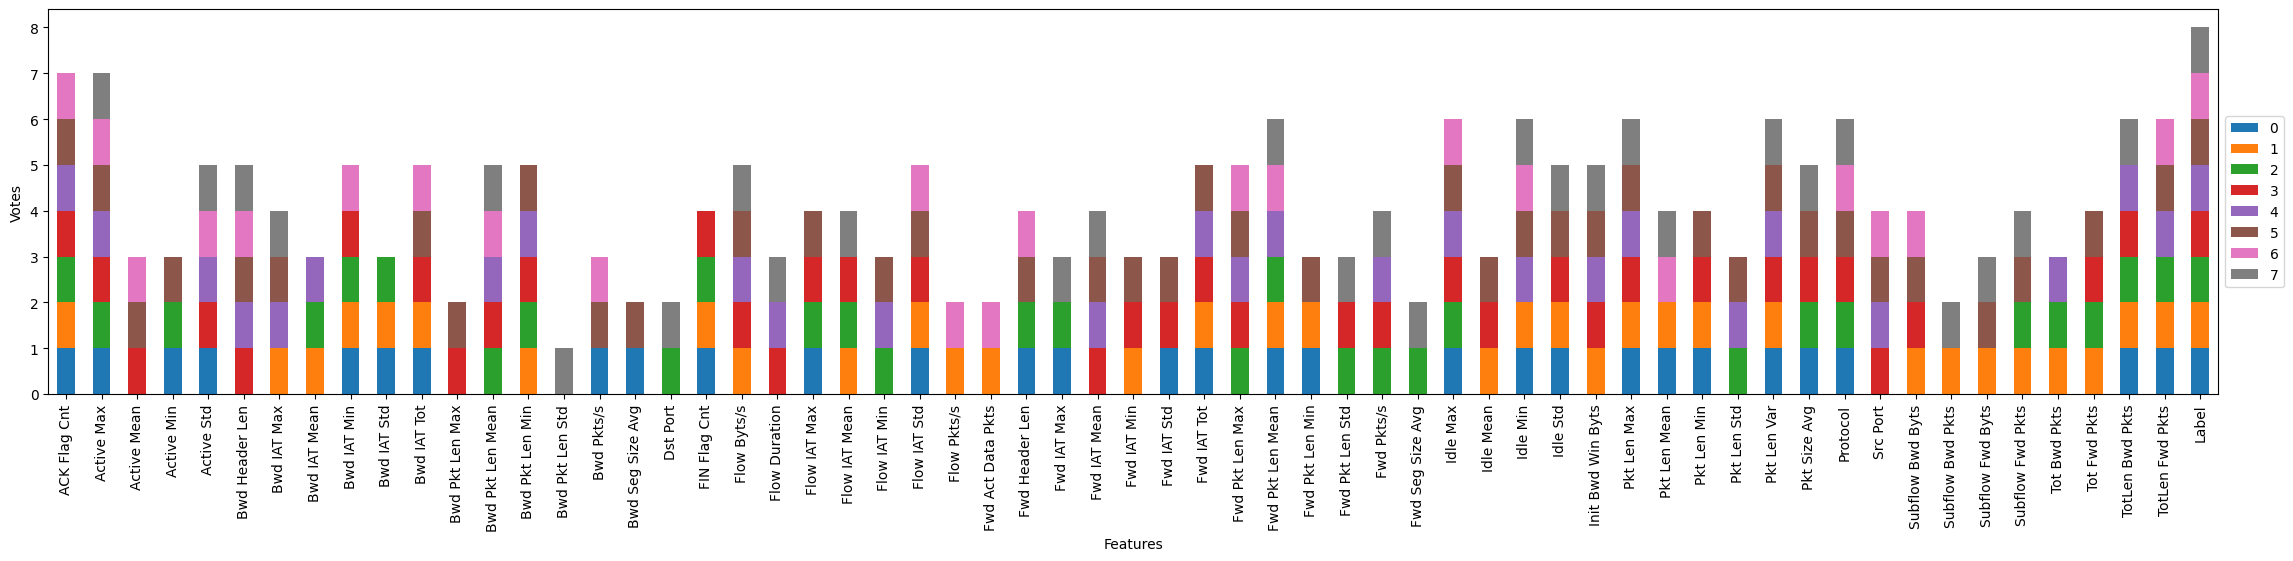

In [28]:
df=graph.T
df.plot.bar(stacked=True,figsize=(28,5))#,color=list(colors.values()))
plt.xlabel('Features')
plt.ylabel('Votes')
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.savefig("grf.pdf",bbox_inches='tight',format="pdf")#, dpi=400)
plt.show()

In [29]:
fdict={}
for i in range(2,9):
    fdict[i]=[]
    

In [30]:
fdict

{2: [], 3: [], 4: [], 5: [], 6: [], 7: [], 8: []}

In [31]:

for ii,i in enumerate(df.values):
    temp=sum(i)
    for j in range(temp,0,-1):
        try:
           fdict[j].append(df.index[ii])
        except:pass
        
    

In [32]:
fdict

{2: ['ACK Flag Cnt',
  'Active Max',
  'Active Mean',
  'Active Min',
  'Active Std',
  'Bwd Header Len',
  'Bwd IAT Max',
  'Bwd IAT Mean',
  'Bwd IAT Min',
  'Bwd IAT Std',
  'Bwd IAT Tot',
  'Bwd Pkt Len Max',
  'Bwd Pkt Len Mean',
  'Bwd Pkt Len Min',
  'Bwd Pkts/s',
  'Bwd Seg Size Avg',
  'Dst Port',
  'FIN Flag Cnt',
  'Flow Byts/s',
  'Flow Duration',
  'Flow IAT Max',
  'Flow IAT Mean',
  'Flow IAT Min',
  'Flow IAT Std',
  'Flow Pkts/s',
  'Fwd Act Data Pkts',
  'Fwd Header Len',
  'Fwd IAT Max',
  'Fwd IAT Mean',
  'Fwd IAT Min',
  'Fwd IAT Std',
  'Fwd IAT Tot',
  'Fwd Pkt Len Max',
  'Fwd Pkt Len Mean',
  'Fwd Pkt Len Min',
  'Fwd Pkt Len Std',
  'Fwd Pkts/s',
  'Fwd Seg Size Avg',
  'Idle Max',
  'Idle Mean',
  'Idle Min',
  'Idle Std',
  'Init Bwd Win Byts',
  'Pkt Len Max',
  'Pkt Len Mean',
  'Pkt Len Min',
  'Pkt Len Std',
  'Pkt Len Var',
  'Pkt Size Avg',
  'Protocol',
  'Src Port',
  'Subflow Bwd Byts',
  'Subflow Bwd Pkts',
  'Subflow Fwd Byts',
  'Subflow Fwd Pkt

In [ ]:
fdict={2: ['ACK Flag Cnt',
  'Active Max',
  'Active Mean',
  'Active Min',
  'Active Std',
  'Bwd Header Len',
  'Bwd IAT Max',
  'Bwd IAT Mean',
  'Bwd IAT Min',
  'Bwd IAT Std',
  'Bwd IAT Tot',
  'Bwd Pkt Len Max',
  'Bwd Pkt Len Mean',
  'Bwd Pkt Len Min',
  'Bwd Pkts/s',
  'Bwd Seg Size Avg',
  'Dst Port',
  'FIN Flag Cnt',
  'Flow Byts/s',
  'Flow Duration',
  'Flow IAT Max',
  'Flow IAT Mean',
  'Flow IAT Min',
  'Flow IAT Std',
  'Flow Pkts/s',
  'Fwd Act Data Pkts',
  'Fwd Header Len',
  'Fwd IAT Max',
  'Fwd IAT Mean',
  'Fwd IAT Min',
  'Fwd IAT Std',
  'Fwd IAT Tot',
  'Fwd Pkt Len Max',
  'Fwd Pkt Len Mean',
  'Fwd Pkt Len Min',
  'Fwd Pkt Len Std',
  'Fwd Pkts/s',
  'Fwd Seg Size Avg',
  'Idle Max',
  'Idle Mean',
  'Idle Min',
  'Idle Std',
  'Init Bwd Win Byts',
  'Pkt Len Max',
  'Pkt Len Mean',
  'Pkt Len Min',
  'Pkt Len Std',
  'Pkt Len Var',
  'Pkt Size Avg',
  'Protocol',
  'Src Port',
  'Subflow Bwd Byts',
  'Subflow Bwd Pkts',
  'Subflow Fwd Byts',
  'Subflow Fwd Pkts',
  'Tot Bwd Pkts',
  'Tot Fwd Pkts',
  'TotLen Bwd Pkts',
  'TotLen Fwd Pkts',
  'Label'],
 3: ['ACK Flag Cnt',
  'Active Max',
  'Active Mean',
  'Active Min',
  'Active Std',
  'Bwd Header Len',
  'Bwd IAT Max',
  'Bwd IAT Mean',
  'Bwd IAT Min',
  'Bwd IAT Std',
  'Bwd IAT Tot',
  'Bwd Pkt Len Mean',
  'Bwd Pkt Len Min',
  'Bwd Pkts/s',
  'FIN Flag Cnt',
  'Flow Byts/s',
  'Flow Duration',
  'Flow IAT Max',
  'Flow IAT Mean',
  'Flow IAT Min',
  'Flow IAT Std',
  'Fwd Header Len',
  'Fwd IAT Max',
  'Fwd IAT Mean',
  'Fwd IAT Min',
  'Fwd IAT Std',
  'Fwd IAT Tot',
  'Fwd Pkt Len Max',
  'Fwd Pkt Len Mean',
  'Fwd Pkt Len Min',
  'Fwd Pkt Len Std',
  'Fwd Pkts/s',
  'Idle Max',
  'Idle Mean',
  'Idle Min',
  'Idle Std',
  'Init Bwd Win Byts',
  'Pkt Len Max',
  'Pkt Len Mean',
  'Pkt Len Min',
  'Pkt Len Std',
  'Pkt Len Var',
  'Pkt Size Avg',
  'Protocol',
  'Src Port',
  'Subflow Bwd Byts',
  'Subflow Fwd Byts',
  'Subflow Fwd Pkts',
  'Tot Bwd Pkts',
  'Tot Fwd Pkts',
  'TotLen Bwd Pkts',
  'TotLen Fwd Pkts',
  'Label'],
 4: ['ACK Flag Cnt',
  'Active Max',
  'Active Std',
  'Bwd Header Len',
  'Bwd IAT Max',
  'Bwd IAT Min',
  'Bwd IAT Tot',
  'Bwd Pkt Len Mean',
  'Bwd Pkt Len Min',
  'FIN Flag Cnt',
  'Flow Byts/s',
  'Flow IAT Max',
  'Flow IAT Mean',
  'Flow IAT Std',
  'Fwd Header Len',
  'Fwd IAT Mean',
  'Fwd IAT Tot',
  'Fwd Pkt Len Max',
  'Fwd Pkt Len Mean',
  'Fwd Pkts/s',
  'Idle Max',
  'Idle Min',
  'Idle Std',
  'Init Bwd Win Byts',
  'Pkt Len Max',
  'Pkt Len Mean',
  'Pkt Len Min',
  'Pkt Len Var',
  'Pkt Size Avg',
  'Protocol',
  'Src Port',
  'Subflow Bwd Byts',
  'Subflow Fwd Pkts',
  'Tot Fwd Pkts',
  'TotLen Bwd Pkts',
  'TotLen Fwd Pkts',
  'Label'],
 5: ['ACK Flag Cnt',
  'Active Max',
  'Active Std',
  'Bwd Header Len',
  'Bwd IAT Min',
  'Bwd IAT Tot',
  'Bwd Pkt Len Mean',
  'Bwd Pkt Len Min',
  'Flow Byts/s',
  'Flow IAT Std',
  'Fwd IAT Tot',
  'Fwd Pkt Len Max',
  'Fwd Pkt Len Mean',
  'Idle Max',
  'Idle Min',
  'Idle Std',
  'Init Bwd Win Byts',
  'Pkt Len Max',
  'Pkt Len Var',
  'Pkt Size Avg',
  'Protocol',
  'TotLen Bwd Pkts',
  'TotLen Fwd Pkts',
  'Label'],
 6: ['ACK Flag Cnt',
  'Active Max',
  'Fwd Pkt Len Mean',
  'Idle Max',
  'Idle Min',
  'Pkt Len Max',
  'Pkt Len Var',
  'Protocol',
  'TotLen Bwd Pkts',
  'TotLen Fwd Pkts',
  'Label'],
 7: ['ACK Flag Cnt', 'Active Max', 'Label'],
 8: ['Label']}